## Load Data

In [1]:
import pandas as pd


df_combined_five = pd.read_csv("./dataprep_df_combined_five.csv")
df_combined_five.head()

,Unnamed: 0,Unnamed: 0_daily,TICKER,Date,Daily_Return,month_key,SP500_Return,VIX_Close,public_date,de_ratio,...,cash_debt,permno,Unnamed: 0_monthly,PERMNO,tentativeSICCD,starting_date,end_date,correct_siccd,start_of_month,end_of_month
0,0,22203,AAPL,2010-02-02,0.005803,2010-02,0.012973,21.480000,2010-02-28,0.639,...,0.641,14593,2612,14593,3571.0,2010-01-04,NaN,3571.0,2010-02-01,2010-02-28
1,1,22204,AAPL,2010-02-03,0.017206,2010-02,-0.005474,21.600000,2010-02-28,0.639,...,0.641,14593,2612,14593,3571.0,2010-01-04,NaN,3571.0,2010-02-01,2010-02-28
2,2,22205,AAPL,2010-02-04,-0.036038,2010-02,-0.031141,26.080000,2010-02-28,0.639,...,0.641,14593,2612,14593,3571.0,2010-01-04,NaN,3571.0,2010-02-01,2010-02-28
3,3,22206,AAPL,2010-02-05,0.017755,2010-02,0.002897,26.110001,2010-02-28,0.639,...,0.641,14593,2612,14593,3571.0,2010-01-04,NaN,3571.0,2010-02-01,2010-02-28
4,4,22207,AAPL,2010-02-08,-0.006856,2010-02,-0.008863,26.510000,2010-02-28,0.639,...,0.641,14593,2612,14593,3571.0,2010-01-04,NaN,3571.0,2010-02-01,2010-02-28


In [2]:
df_combined_five["Date"] = pd.to_datetime(df_combined_five["Date"])

In [3]:
df_combined_five.dtypes

Unnamed: 0                     int64
Unnamed: 0_daily               int64
TICKER                        object
Date                  datetime64[ns]
Daily_Return                 float64
month_key                     object
SP500_Return                 float64
VIX_Close                    float64
public_date                   object
de_ratio                     float64
ptb                          float64
debt_assets                  float64
inv_turn                     float64
at_turn                      float64
rect_turn                    float64
cash_ratio                   float64
pe_inc                       float64
gpm                          float64
roe                          float64
roa                          float64
cfm                          float64
cash_debt                    float64
permno                         int64
Unnamed: 0_monthly             int64
PERMNO                         int64
tentativeSICCD               float64
starting_date                 object
e

In [4]:
df_merged_five = pd.read_csv("./dataprep_df_merged_five.csv")
df_merged_five.head()

,Unnamed: 0.1,public_date,de_ratio,ptb,debt_assets,inv_turn,at_turn,rect_turn,cash_ratio,pe_inc,...,permno,Unnamed: 0,PERMNO,tentativeSICCD,starting_date,end_date,correct_siccd,start_of_month,end_of_month,month_key
0,0,2010-01-31,0.991,1.152,0.498,2.272,1.001,6.346,0.466,16.550,...,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0,2010-01-01,2010-01-31,2010-01
1,2,2010-02-28,0.991,1.128,0.498,2.272,1.001,6.346,0.466,16.200,...,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0,2010-02-01,2010-02-28,2010-02
2,4,2010-03-31,0.991,1.237,0.498,2.272,1.001,6.346,0.466,17.729,...,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0,2010-03-01,2010-03-31,2010-03
3,6,2010-04-30,0.897,1.197,0.473,2.312,0.987,6.314,0.545,19.821,...,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0,2010-04-01,2010-04-30,2010-04
4,8,2010-05-31,0.897,0.968,0.473,2.312,0.987,6.314,0.545,16.016,...,54594,11702,54594,3721.0,2010-01-04,2014-01-08,3721.0,2010-05-01,2010-05-31,2010-05


<AxesSubplot: >

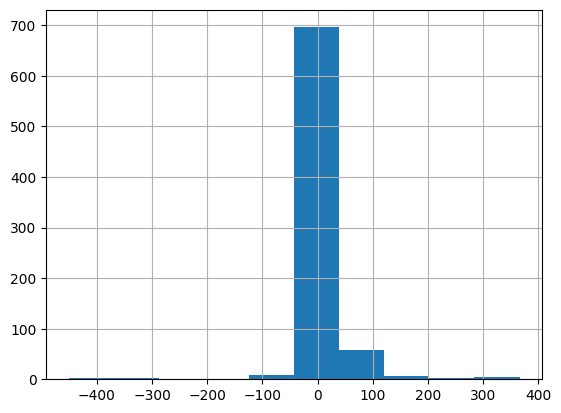

In [5]:
df_merged_five.pe_inc.hist()

In [11]:
df_combined_five.columns

Index(['Unnamed: 0', 'Unnamed: 0_daily', 'TICKER', 'Date', 'Daily_Return',
       'month_key', 'SP500_Return', 'VIX_Close', 'public_date', 'de_ratio',
       'ptb', 'debt_assets', 'inv_turn', 'at_turn', 'rect_turn', 'cash_ratio',
       'pe_inc', 'gpm', 'roe', 'roa', 'cfm', 'cash_debt', 'permno',
       'Unnamed: 0_monthly', 'PERMNO', 'tentativeSICCD', 'starting_date',
       'end_date', 'correct_siccd', 'start_of_month', 'end_of_month'],
      dtype='object')

## Create Torch Dataset Object

In [12]:
import numpy as np 
import torch
from torch.utils.data import Dataset, default_collate


class DataAccessor:

    def  __init__(
        self,
        df,
        security_col,
        return_col,
        date_col,
        # lookback,
        cont_cols=None,
        # cat_cols=None,
        train_start_date=None, # Inclusive
        train_end_date=None, # Exclusive        
    ):
        df = df.sort_values([security_col, date_col]).reset_index(drop=True)
        df["_cumcount"] = df.groupby(security_col).cumcount()
        df["_index"] = np.arange(len(df))

        self.df = df
        self.date_col = date_col
        self.security_col= security_col

        self.index_lookup_dict = df.groupby([date_col, security_col])["_index"].first().to_dict()
        self.per_day_index = df.groupby(date_col)["_index"].unique().to_dict()

        train_sub_df = df
        if train_start_date is not None:
            train_sub_df = train_sub_df[train_sub_df[date_col] >= pd.to_datetime(train_start_date)]
        if train_end_date is not None:
            train_sub_df = train_sub_df[train_sub_df[date_col] < pd.to_datetime(train_end_date)]
        
        norm_stats = {}

        returns_std = train_sub_df[return_col].std()
        norm_stats["returns_std"] = returns_std
        self.returns = torch.Tensor(df[return_col].values / returns_std).float()

        if cont_cols is None:
            cont_cols = tuple()
        # if len(cont_cols) > 0:
        cont_cols_mean, cont_cols_std = train_sub_df[cont_cols].mean().values, train_sub_df[cont_cols].std().values
        norm_stats["cont_cols_mean"] = cont_cols_mean
        norm_stats["cont_cols_std"] = cont_cols_std
        self.cont_feats = torch.Tensor((df[cont_cols].values - cont_cols_mean) / cont_cols_std).float()
        # else:
        #     self.cont_feats = None

        self.cumcounts = torch.Tensor(df["_cumcount"].values)
        self.norm_stats = norm_stats

    def get_all_securities_by_date(
        self,
        date,
        lookback,
    ):
        return default_collate([
            self.get_row_by_index(index) for index in self.per_day_index[date]
        ])

    def get_row_by_index(self, index, lookback):
        assert self.cumcounts[index] >= lookback

        out = {
            "future_return": self.returns[index],
            "lookback_returns": self.returns[index - lookback: index],
        }
        # if self.cont_feats is not None:
        out["lookback_cont_features"] = self.cont_feats[index - lookback: index]
        return out

    def get_by_security_and_date(
        self, 
        security, 
        date,
        lookback,
    ):
        index = self.index_lookup_dict[(date, security)]
        return self.get_row_by_index(index, lookback)

class MyDataset(Dataset):

    def __init__(
        self,
        data_accessor: DataAccessor,
        lookback: int,
        start_date=None,
        end_date=None,
    ):
        self.data_accessor = data_accessor
        self.lookback = lookback

        df = data_accessor.df
        date_col = data_accessor.date_col

        sub_df = df[
            (df["_cumcount"] >= lookback)
        ]
        if start_date is not None:
            sub_df = sub_df[sub_df[date_col] >= pd.to_datetime(start_date)]
        if end_date is not None:
            sub_df = sub_df[sub_df[date_col] < pd.to_datetime(end_date)]
        
        self.per_day_index = sub_df.groupby(date_col)["_index"].unique().to_dict()
        self.dates = list(self.per_day_index.keys())

    def __getitem__(self, idx):
        date = self.dates[idx]
        indices = self.per_day_index[date]
        return default_collate([
            self.data_accessor.get_row_by_index(index, lookback=self.lookback) for index in indices
        ])
    
    def __len__(self):
        return len(self.dates)

In [13]:

TRAINING_START_DATE = None
VALIDATION_START_DATE = "2018-01-01"
TESTING_START_DATE = "2020-01-01"
LOOKBACK = 32
CONT_COLS=[
    # 'SP500_Return', 
    # 'VIX_Close',
    # 'de_ratio',
    # 'ptb', 'debt_assets', 'inv_turn', 'at_turn', 'rect_turn', 'cash_ratio',
    # 'pe_inc', 'gpm', 'roe', 'roa', 'cfm', 'cash_debt'
]

data_accessor = DataAccessor(
    df_combined_five,
    security_col="TICKER",
    return_col="Daily_Return",
    date_col="Date",
    cont_cols=CONT_COLS,
    train_start_date=TRAINING_START_DATE,
    train_end_date=VALIDATION_START_DATE,
)
train_dataset = MyDataset(
    data_accessor=data_accessor,
    lookback=LOOKBACK,
    start_date=TRAINING_START_DATE,
    end_date=VALIDATION_START_DATE,
)
valid_dataset = MyDataset(
    data_accessor=data_accessor,
    lookback=LOOKBACK,
    start_date=VALIDATION_START_DATE,
    end_date=TESTING_START_DATE,
)
test_dataset = MyDataset(
    data_accessor=data_accessor,
    lookback=LOOKBACK,
    start_date=TESTING_START_DATE,
)

In [14]:
len(train_dataset), len(valid_dataset), len(test_dataset)

(1961, 503, 756)

In [ ]:
from torch.utils.data import DataLoader


def infinite_loader(loader):
    while True:
        for batch in loader:
            yield batch
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False, drop_last=False)


## Train Simple VAE

By "Simple VAE", we mean concatenating all securities into a vector and training a VAE on this multivariate target.

In [29]:
import pytorch_lightning as pl
from src.simple_vae import SimpleVAE
from pytorch_lightning.loggers import CSVLogger


model = SimpleVAE(
    num_securities=5,
    num_cont_cols=len(CONT_COLS),
    hidden_size=64,
    embed_size=4,
    num_blocks=2,
    out_dist='StudentT',
    dropout=0.0,
    warmup_period=100,
    k=20,
    lr=1e-4,
    wd=0,
)

logger = CSVLogger('./logs/')
trainer = pl.Trainer(
    max_epochs=20,
    accelerator='cpu', 
    limit_train_batches=100,
    logger=logger,
    enable_progress_bar=True,
)

inf_train_dataloader = infinite_loader(train_dataloader)
trainer.fit(model, train_dataloaders=inf_train_dataloader, val_dataloaders=val_dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name               | Type       | Params | Mode 
----------------------------------------------------------
0 | conditioning_model | Sequential | 75.3 K | train
1 | encoder            | Sequential | 21.6 K | train
2 | decoder            | Sequential | 22.0 K | train
----------------------------------------------------------
118 K     Trainable params
0         Non-trainable params
118 K     Total params
0.476     Total estimated model params size (MB)
66        Modules in train mode
0         Modules in eval mode


Epoch 19: 100%|██████████| 100/100 [00:13<00:00,  7.36it/s, v_num=15, train_loss_step=6.760, val_loss=6.550, train_loss_epoch=6.050]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 100/100 [00:13<00:00,  7.33it/s, v_num=15, train_loss_step=6.760, val_loss=6.550, train_loss_epoch=6.050]


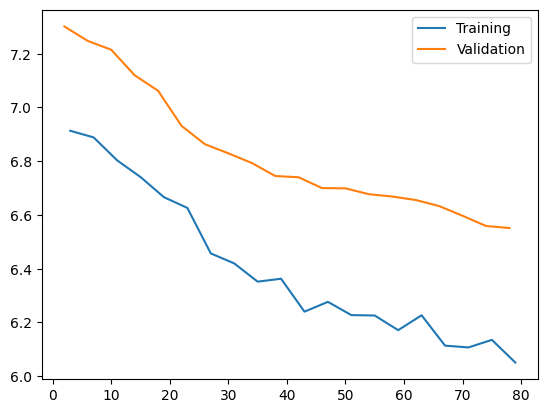

In [30]:
import os
from matplotlib import pyplot as plt

pd.read_csv(os.path.join(logger.log_dir, "metrics.csv")).train_loss_epoch.dropna().plot(label="Training")
pd.read_csv(os.path.join(logger.log_dir, "metrics.csv")).val_loss.dropna().plot(label="Validation")
plt.legend()
plt.show()

## Train Enhanced VAE

By "Enhanced VAE", instead of concatenating the returns:
1. we run an RNN on each security independently
2. take each hidden vector, average them across the universe, and apply layers to get posterior (i.e., a single z vector for all securities)
3. decode using the shared z and the hidden state from step 1

By design, this model:
* Is permutation equivariant
* Agnostic to number of securites

In [37]:
import pytorch_lightning as pl
from src.enhanced_vae import EnhancedVAE
from pytorch_lightning.loggers import CSVLogger


model = EnhancedVAE(
    num_securities=5,
    num_cont_cols=len(CONT_COLS),
    hidden_size=64,
    embed_size=4,
    num_blocks=2,
    out_dist='StudentT',
    dropout=0.0,
    warmup_period=100,
    k=20,
    lr=1e-4,
    wd=0,
)

logger = CSVLogger('./logs/')
trainer = pl.Trainer(
    max_epochs=20,
    accelerator='cpu', 
    limit_train_batches=100,
    logger=logger,
    enable_progress_bar=True,
)

inf_train_dataloader = infinite_loader(train_dataloader)
trainer.fit(model, train_dataloaders=inf_train_dataloader, val_dataloaders=val_dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name               | Type       | Params | Mode 
----------------------------------------------------------
0 | conditioning_model | Sequential | 75.0 K | train
1 | ind_cond           | ResidBlock | 8.3 K  | train
2 | agg_cond           | ResidBlock | 8.3 K  | train
3 | encoder_ind        | Sequential | 20.9 K | train
4 | encoder_agg        | Sequential | 8.8 K  | train
5 | decoder            | Sequential | 21.3 K | train
----------------------------------------------------------
142 K     Trainable params
0         Non-trainable params
142 K     Total params
0.570     Total estimated model params size (MB)
91        Modules in train mode
0         Modules in eval mode


Epoch 19: 100%|██████████| 100/100 [00:23<00:00,  4.29it/s, v_num=19, train_loss_step=6.260, val_loss=6.310, train_loss_epoch=5.960]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 100/100 [00:23<00:00,  4.28it/s, v_num=19, train_loss_step=6.260, val_loss=6.310, train_loss_epoch=5.960]


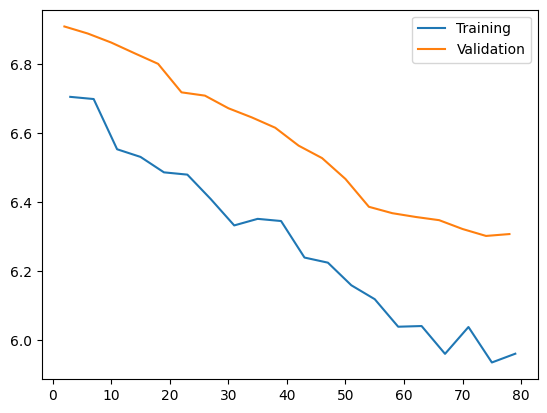

In [38]:
import os
from matplotlib import pyplot as plt

pd.read_csv(os.path.join(logger.log_dir, "metrics.csv")).train_loss_epoch.dropna().plot(label="Training")
pd.read_csv(os.path.join(logger.log_dir, "metrics.csv")).val_loss.dropna().plot(label="Validation")
plt.legend()
plt.show()

## Train Neural Factors


In [74]:
import pytorch_lightning as pl
from src.neural_factors import NeuralFactors
from pytorch_lightning.loggers import CSVLogger


model = NeuralFactors(
    num_securities=5,
    num_cont_cols=len(CONT_COLS),
    hidden_size=64,
    embed_size=4,
    num_blocks=2,
    out_dist='StudentT',
    dropout=0.0,
    warmup_period=100,
    k=20,
    lr=1e-4,
    wd=0,
)

logger = CSVLogger('./logs/')
trainer = pl.Trainer(
    max_epochs=20,
    accelerator='cpu', 
    limit_train_batches=100,
    logger=logger,
    enable_progress_bar=True,
)

inf_train_dataloader = infinite_loader(train_dataloader)
trainer.fit(model, train_dataloaders=inf_train_dataloader, val_dataloaders=val_dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name               | Type       | Params | Mode 
----------------------------------------------------------
0 | conditioning_model | Sequential | 75.0 K | train
1 | out_layer          | Linear     | 390    | train
----------------------------------------------------------
75.4 K    Trainable params
0         Non-trainable params
75.4 K    Total params
0.302     Total estimated model params size (MB)
29        Modules in train mode
0         Modules in eval mode


Epoch 19: 100%|██████████| 100/100 [00:28<00:00,  3.47it/s, v_num=35, train_loss_step=5.280, val_loss=6.180, train_loss_epoch=5.890]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 100/100 [00:28<00:00,  3.47it/s, v_num=35, train_loss_step=5.280, val_loss=6.180, train_loss_epoch=5.890]


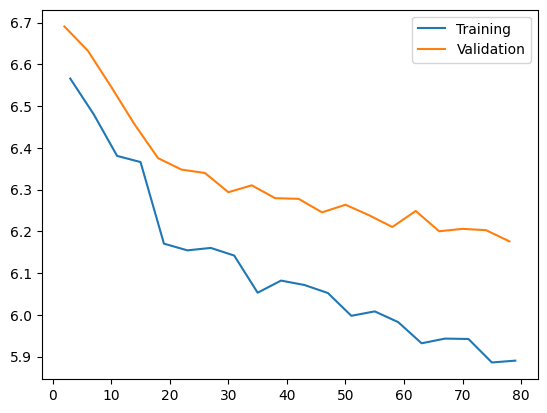

In [81]:
import os
from matplotlib import pyplot as plt

pd.read_csv(os.path.join(logger.log_dir, "metrics.csv")).train_loss_epoch.dropna().plot(label="Training")
pd.read_csv(os.path.join(logger.log_dir, "metrics.csv")).val_loss.dropna().plot(label="Validation")
plt.legend()
plt.show()

## Compare Validation Losses

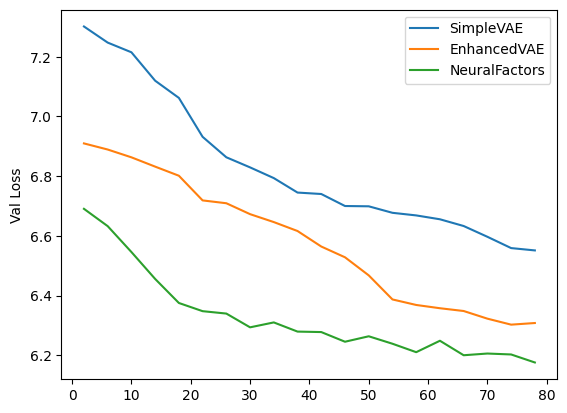

In [82]:
import os
from matplotlib import pyplot as plt


pd.read_csv(os.path.join('./logs/lightning_logs/version_15/', "metrics.csv")).val_loss.dropna().plot(label="SimpleVAE")
pd.read_csv(os.path.join('./logs/lightning_logs/version_19/', "metrics.csv")).val_loss.dropna().plot(label="EnhancedVAE")
pd.read_csv(os.path.join('./logs/lightning_logs/version_35/', "metrics.csv")).val_loss.dropna().plot(label="NeuralFactors")
plt.legend()
plt.ylabel("Val Loss")

plt.show()